<a href="https://www.kaggle.com/code/huanster/pok-mon-team-building?scriptVersionId=209793524" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="text-align:center; border-radius:15px; padding:15px; color:#FFC0CB; margin:0; font-size:150%; font-family: 'Orbitron', sans-serif; background: #2E0249; background: #11001C; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3); overflow:hidden; margin-bottom: 1em;"><b>Pokemon Team Building</b></div>


## **Table of Contents**

1. [Data Loading](#data-loading)
2. [Data Preparation](#data-preparation)
3. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
4. [Visualization](#visualization)
5. [Conclusion](#conclusion)


## Data Loading
We will be loading the data now so that we can start our project

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

#Loading the dataset
df = pd.read_csv('/kaggle/input/pokdex/pokemon_bw.csv')

## Data-Preparation
Prepping the data so that can we start analyzing.

In [2]:
df.isnull().sum()


No           0
Name         0
Type         0
Abilities    0
HP           0
Att          0
Def          0
S.Att        0
S.Def        0
Spd          0
dtype: int64

In [3]:
# Check for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")


Number of duplicate rows: 310


In [4]:
# Remove duplicates
df = df.drop_duplicates()

In [5]:
#display first few rows
df.head()

,No,Name,Type,Abilities,HP,Att,Def,S.Att,S.Def,Spd
0,10,Caterpie,bug,"Shield Dust, Run Away",45,30,35,20,20,45
1,11,Metapod,bug,"Shed Skin, Shed Skin",50,20,55,25,25,30
2,12,Butterfree,"bug, flying","Compoundeyes, Tinted Lens",60,45,50,80,80,70
3,13,Weedle,"bug, poison","Shield Dust, Run Away",40,35,30,20,20,50
4,14,Kakuna,"bug, poison","Shed Skin, Shed Skin",45,25,50,25,25,35


In [6]:
# Standardize column names
df.columns = (
    df.columns
    .str.strip()                     # Remove extra spaces
    .str.replace('.', '_')           # Replace periods with underscores
    .str.replace(' ', '_')           # Replace spaces with underscores
    .str.lower()                     # Convert to lowercase for consistency
)


In [7]:
# Rename specific columns for clarity
df.rename(columns={
    'no': 'number',
    'name': 'pokemon_name',
    'type': 'type',
    'abilities': 'abilities',
    'hp': 'hp',
    'att': 'attack',
    'def': 'defense',
    's_att': 'special_attack',
    's_def': 'special_defense',
    'spd': 'speed'
}, inplace=True)

In [8]:
# Check updated column names
print("Updated Column Names:", df.columns)

Updated Column Names: Index(['number', 'pokemon_name', 'type', 'abilities', 'hp', 'attack',
       'defense', 'special_attack', 'special_defense', 'speed'],
      dtype='object')


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 684 entries, 0 to 991
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   number           684 non-null    int64 
 1   pokemon_name     684 non-null    object
 2   type             684 non-null    object
 3   abilities        684 non-null    object
 4   hp               684 non-null    int64 
 5   attack           684 non-null    int64 
 6   defense          684 non-null    int64 
 7   special_attack   684 non-null    int64 
 8   special_defense  684 non-null    int64 
 9   speed            684 non-null    int64 
dtypes: int64(7), object(3)
memory usage: 58.8+ KB


In [10]:
# 2. Correct numeric columns (if needed)
numeric_columns = ['number', 'hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, set invalid values to NaN

In [11]:
# 3. Convert categorical columns to category type
categorical_columns = ['pokemon_name', 'type', 'abilities']
for col in categorical_columns:
    df[col] = df[col].astype('category')

In [12]:
# 4. Check data types again after correction
print("After correction:")
print(df.info())

After correction:
<class 'pandas.core.frame.DataFrame'>
Index: 684 entries, 0 to 991
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   number           684 non-null    int64   
 1   pokemon_name     684 non-null    category
 2   type             684 non-null    category
 3   abilities        684 non-null    category
 4   hp               684 non-null    int64   
 5   attack           684 non-null    int64   
 6   defense          684 non-null    int64   
 7   special_attack   684 non-null    int64   
 8   special_defense  684 non-null    int64   
 9   speed            684 non-null    int64   
dtypes: category(3), int64(7)
memory usage: 83.4 KB
None


In [13]:
# looking for inconsistencies
print(df['type'].unique())
print(df['abilities'].unique())

['bug', 'bug, flying', 'bug, poison', 'bug, grass', 'bug, steel', ..., 'steel, rock', 'rock, steel', 'steel', 'water, steel', 'water']
Length: 124
Categories (124, object): ['bug', 'bug, electric', 'bug, fighting', 'bug, fire', ..., 'water, poison', 'water, psychic', 'water, rock', 'water, steel']
['Shield Dust, Run Away', 'Shed Skin, Shed Skin', 'Compoundeyes, Tinted Lens', 'Swarm, Sniper', 'Effect Spore, Dry Skin, Damp', ..., 'Torrent, Shell Armor', 'Gluttony, Torrent', 'Reckless, Adaptability, Mold Breaker', 'Rock Head, Adaptability, Mold Breaker', 'Healer, Hydration, Regenerator']
Length: 381
Categories (381, object): ['Adaptability, Download, Analytic', 'Aftermath, Unburden, Flare Boost', 'Air Lock', 'Anticipation', ..., 'White Smoke, Shell Armor', 'Wonder Guard, Wonder Guard', 'Wonder Skin, Magic Guard, Tinted Lens', 'Zen Mode']


In [14]:
df['type'] = df['type'].str.lower().str.strip()  # Lowercase and remove spaces
df['abilities'] = df['abilities'].str.lower().str.strip()

In [15]:
type_mapping = {
    'fire ': 'fire',
    'fire': 'fire',
    'electric ': 'electric',
    'electric': 'electric'
}
df['type'] = df['type'].replace(type_mapping)

In [16]:
df['primary_type'] = df['type'].apply(lambda x: x.split(',')[0].strip())
df['secondary_type'] = df['type'].apply(lambda x: x.split(',')[1].strip() if ',' in x else None)

In [17]:
type_counts = df['type'].value_counts()
print(type_counts)

# Group infrequent categories
rare_types = type_counts[type_counts < 5].index  # Example threshold
df['type'] = df['type'].replace(rare_types, 'other')

type
normal             68
water              57
psychic            36
grass              32
electric           27
                   ..
electric, water     1
electric, grass     1
electric, fire      1
bug, fighting       1
fire, rock          1
Name: count, Length: 124, dtype: int64


In [18]:
print(df['type'].unique())

['bug' 'bug, flying' 'bug, poison' 'bug, grass' 'bug, steel' 'other'
 'dark' 'dragon' 'electric' 'electric, flying' 'fighting' 'fire, fighting'
 'fire' 'normal, flying' 'water, flying' 'psychic, flying' 'grass, flying'
 'ghost' 'grass, poison' 'grass' 'ground' 'rock, ground' 'water, ground'
 'ice' 'normal' 'poison' 'psychic' 'steel, psychic' 'rock' 'steel' 'water']


In [19]:
# Create the Total Stats column
df['total_stats'] = df['hp'] + df['attack'] + df['defense'] + df['special_attack'] + df['special_defense'] + df['speed']


In [20]:
print(df[['pokemon_name', 'total_stats']].head())

  pokemon_name  total_stats
0     Caterpie          195
1      Metapod          205
2   Butterfree          385
3       Weedle          195
4       Kakuna          205


## Exploratory Data Analysis (EDA)
We will begin to explore the data to find key insights on what makes a good pokemon team.

In [21]:

# Group by 'type' and calculate the mean for numerical columns
grouped_stats = df.groupby('type')[['hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed']].mean()


In [22]:
# Display the grouped stats
print(grouped_stats)

                         hp      attack     defense  special_attack  \
type                                                                  
bug               58.687500   57.437500   60.125000       45.875000   
bug, flying       61.416667   64.583333   57.666667       70.416667   
bug, grass        55.000000   73.833333   76.666667       57.333333   
bug, poison       52.727273   59.090909   59.727273       45.000000   
bug, steel        66.285714  103.142857  106.000000       68.714286   
dark              66.000000   85.800000   67.200000       81.800000   
dragon            66.333333  101.000000   77.777778       58.888889   
electric          61.851852   70.888889   56.037037       77.592593   
electric, flying  70.600000   90.000000   78.400000      115.000000   
fighting          73.800000   99.000000   65.600000       46.500000   
fire              65.814815   81.925926   61.370370       76.444444   
fire, fighting    80.000000  100.500000   62.166667       91.166667   
ghost 

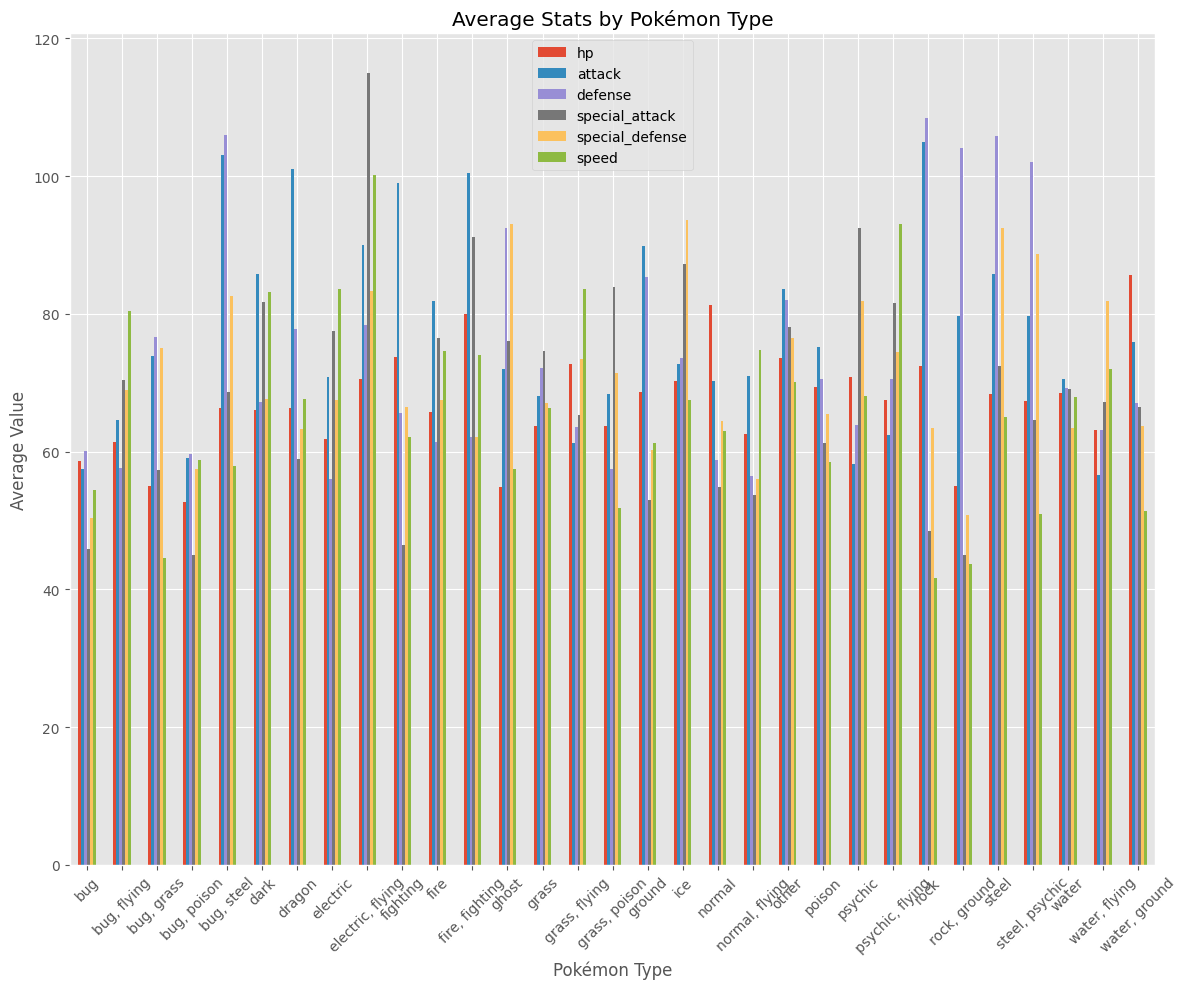

In [23]:
# Visualize average stats for each type
grouped_stats.plot(kind='bar', figsize=(12, 10), title='Average Stats by Pokémon Type')
plt.ylabel('Average Value')
plt.xlabel('Pokémon Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Attack Type

In [24]:
strongest_attack_type = grouped_stats['attack'].idxmax()
highest_attack_value = round(grouped_stats['attack'].max(), 2)

print(f"The strongest type for attack is {strongest_attack_type} with an average attack of {highest_attack_value}.")

The strongest type for attack is rock with an average attack of 105.0.


## Defense Type

In [25]:
strongest_defense_type = grouped_stats['defense'].idxmax()
highest_defense_value = round(grouped_stats['defense'].max(), 2)

strongest_special_defense_type = grouped_stats['special_defense'].idxmax()
highest_special_defense_value = round(grouped_stats['special_defense'].max(), 2)

print(f"The strongest type for defense is {strongest_defense_type} with an average defense of {highest_defense_value}.")
print(f"The strongest type for special defense is {strongest_special_defense_type} with an average special defense of {highest_special_defense_value}.")

The strongest type for defense is rock with an average defense of 108.5.
The strongest type for special defense is ice with an average special defense of 93.64.


## Balance Type

In [26]:
type_variance = grouped_stats.var(axis=1)
balanced_type = type_variance.idxmin()
lowest_variance = type_variance.min()

print(f"The most balanced type is {balanced_type} with the lowest variance of {lowest_variance:.2f}.")

The most balanced type is water with the lowest variance of 6.07.


## Speed Type

In [27]:
fastest_type = grouped_stats['speed'].idxmax()
highest_speed_value = round(grouped_stats['speed'].max(), 2)

print(f"The fastest type is {fastest_type} with an average speed of {highest_speed_value}.")


The fastest type is electric, flying with an average speed of 100.2.


## Correlation

Insight: Discover relationships between different stats (e.g., is high attack correlated with high speed?).

                       hp    attack   defense  special_attack  \
hp               1.000000  0.458814  0.279132        0.401872   
attack           0.458814  1.000000  0.444768        0.374695   
defense          0.279132  0.444768  1.000000        0.281205   
special_attack   0.401872  0.374695  0.281205        1.000000   
special_defense  0.425338  0.248643  0.547877        0.521673   
speed            0.234073  0.396353  0.074636        0.488098   

                 special_defense     speed  
hp                      0.425338  0.234073  
attack                  0.248643  0.396353  
defense                 0.547877  0.074636  
special_attack          0.521673  0.488098  
special_defense         1.000000  0.297926  
speed                   0.297926  1.000000  


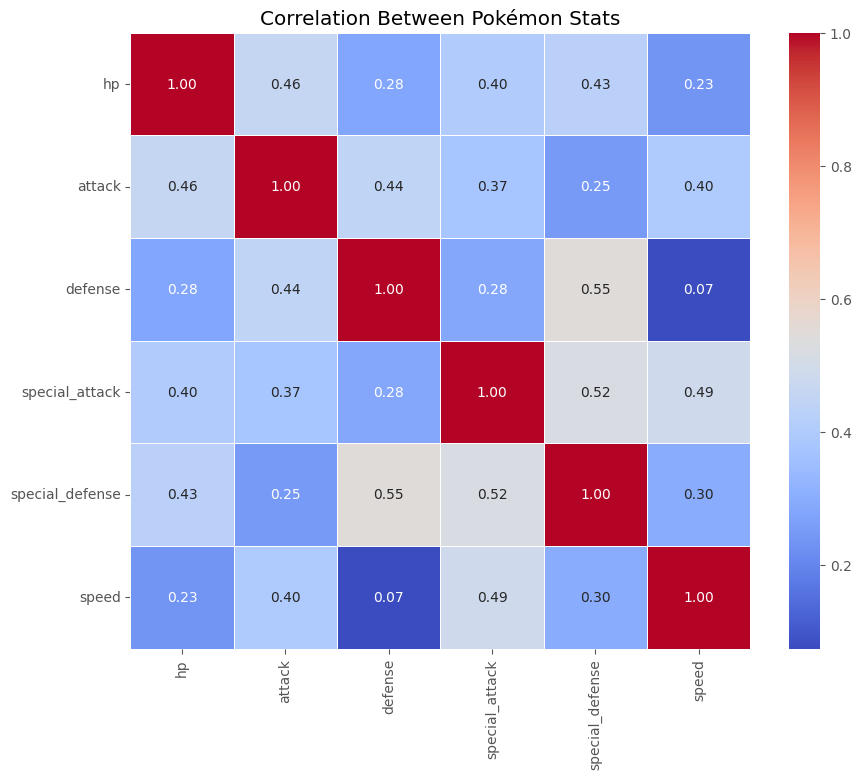

In [28]:
# Select numerical columns for correlation
numerical_columns = ['hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed']

# Compute the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Print the correlation matrix
print(correlation_matrix)

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Between Pokémon Stats")
plt.show()

In [29]:
# List of stats to rank by
key_metrics = ['hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed', 'total_stats']

# Iterate through each metric and display the top 10 Pokémon
for metric in key_metrics:
    print(f"Top 10 Pokémon by {metric.capitalize()}:")
    top_10 = df.sort_values(by=metric, ascending=False).head(10)
    print(top_10[['pokemon_name', metric]])
    print("-" * 50)


Top 10 Pokémon by Hp:
    pokemon_name   hp
611      Blissey  255
585      Chansey  250
743    Wobbuffet  190
943      Wailord  170
991    Alomomola  165
591      Snorlax  160
336     Drifblim  150
125     Giratina  150
618      Slaking  150
124     Giratina  150
--------------------------------------------------
Top 10 Pokémon by Attack:
    pokemon_name  attack
137       Kyurem     170
825    Rampardos     165
618      Slaking     160
646    Regigigas     160
767       Deoxys     150
135       Zekrom     150
510      Groudon     150
118     Rayquaza     150
129      Haxorus     147
366     Landorus     145
--------------------------------------------------
Top 10 Pokémon by Defense:
    pokemon_name  defense
20       Shuckle      230
823     Regirock      200
491      Steelix      200
536     Cloyster      180
815       Aggron      180
827    Bastiodon      168
483         Onix      160
855    Registeel      150
830    Probopass      145
388   Cofagrigus      145
--------------------

## Approach to Exploring Pokémon Battle Strategies

In [30]:
def classify_role(row):
    if row['hp'] > 100 and (row['defense'] > 100 or row['special_defense'] > 100):
        return 'Tank'
    elif row['speed'] > 100 and (row['attack'] > 100 or row['special_attack'] > 100):
        return 'Sweeper'
    else:
        return 'Support'

df['role'] = df.apply(classify_role, axis=1)
print(df[['pokemon_name', 'role']].head(100))


   pokemon_name     role
0      Caterpie  Support
1       Metapod  Support
2    Butterfree  Support
3        Weedle  Support
4        Kakuna  Support
..          ...      ...
95      Scraggy  Support
96      Scrafty  Support
97        Zorua  Support
98      Zoroark  Sweeper
99     Pawniard  Support

[100 rows x 2 columns]


In [31]:
# Strong-against dictionary for single types
strong_against = {
    'bug': ['fire', 'flying', 'rock'],
    'dark': ['fighting', 'bug', 'fairy'],
    'dragon': ['ice', 'dragon', 'fairy'],
    'electric': ['ground'],
    'fighting': ['flying', 'psychic', 'fairy'],
    'fire': ['water', 'rock', 'ground'],
    'ghost': ['ghost', 'dark'],
    'grass': ['fire', 'ice', 'poison', 'flying', 'bug'],
    'ground': ['water', 'grass', 'ice'],
    'ice': ['fire', 'fighting', 'rock', 'steel'],
    'normal': ['fighting'],
    'poison': ['ground', 'psychic'],
    'psychic': ['bug', 'ghost', 'dark'],
    'rock': ['water', 'grass', 'fighting', 'ground', 'steel'],
    'steel': ['fire', 'fighting', 'ground'],
    'water': ['electric', 'grass'],
    'fairy': ['poison', 'steel']
}

# Function to find counters
def find_counters(type_):
    # Split types if dual-type
    types = type_.split(',')
    primary_type = types[0].strip().lower()
    secondary_type = types[1].strip().lower() if len(types) > 1 else None

    # Get counters for primary and secondary types
    primary_counters = strong_against.get(primary_type, [])
    secondary_counters = strong_against.get(secondary_type, []) if secondary_type else []

    # Combine counters, removing duplicates
    combined_counters = list(set(primary_counters + secondary_counters))
    return combined_counters if combined_counters else 'Unknown'

# Apply the function to the DataFrame
df['counters'] = df['type'].apply(find_counters)

# Display the first few rows with counters
print(df[['pokemon_name', 'type', 'counters']].head(50))


   pokemon_name         type                                counters
0      Caterpie          bug                    [rock, flying, fire]
1       Metapod          bug                    [rock, flying, fire]
2    Butterfree  bug, flying                    [rock, flying, fire]
3        Weedle  bug, poison   [ground, flying, fire, psychic, rock]
4        Kakuna  bug, poison   [ground, flying, fire, psychic, rock]
5      Beedrill  bug, poison   [ground, flying, fire, psychic, rock]
6         Paras   bug, grass  [bug, poison, flying, fire, ice, rock]
7      Parasect   bug, grass  [bug, poison, flying, fire, ice, rock]
8       Venonat  bug, poison   [ground, flying, fire, psychic, rock]
9      Venomoth  bug, poison   [ground, flying, fire, psychic, rock]
10      Scyther  bug, flying                    [rock, flying, fire]
11       Pinsir          bug                    [rock, flying, fire]
12       Ledyba  bug, flying                    [rock, flying, fire]
13       Ledian  bug, flying      

**I now want to create optimal battle teams by selecting Pokemon that complement eachothers strengths and mininze weaknesses.**

In [32]:
# Classify Pokémon into roles based on stats
def classify_role(row):
    if row['hp'] > 100 and (row['defense'] > 100 or row['special_defense'] > 100):
        return 'Tank'
    elif row['speed'] > 100 and (row['attack'] > 100 or row['special_attack'] > 100):
        return 'Sweeper'
    else:
        return 'Support'

df['role'] = df.apply(classify_role, axis=1)

# Preview Pokémon roles
print(df[['pokemon_name', 'role']].head(50))


   pokemon_name     role
0      Caterpie  Support
1       Metapod  Support
2    Butterfree  Support
3        Weedle  Support
4        Kakuna  Support
5      Beedrill  Support
6         Paras  Support
7      Parasect  Support
8       Venonat  Support
9      Venomoth  Support
10      Scyther  Sweeper
11       Pinsir  Support
12       Ledyba  Support
13       Ledian  Support
14     Spinarak  Support
15      Ariados  Support
16        Yanma  Support
17       Pineco  Support
18   Forretress  Support
19       Scizor  Support
20      Shuckle  Support
21    Heracross  Support
22      Wurmple  Support
23      Silcoon  Support
24    Beautifly  Support
25      Cascoon  Support
26       Dustox  Support
27      Surskit  Support
28   Masquerain  Support
29      Nincada  Support
30      Ninjask  Support
31     Shedinja  Support
32      Volbeat  Support
33     Illumise  Support
34      Anorith  Support
35      Armaldo  Support
36    Kricketot  Support
37   Kricketune  Support
38        Burmy  Support


In [33]:
if 'Name' in df.columns:
    df.rename(columns={'Name': 'pokemon_name'}, inplace=True)
else:
    print("The Pokémon names are missing from the dataset.")


The Pokémon names are missing from the dataset.


In [34]:
if 'Type' in df.columns:
    df.rename(columns={'Type': 'type'}, inplace=True)
else:
    print("The Pokémon types are missing from the dataset.")


The Pokémon types are missing from the dataset.


In [35]:
# Classify Pokémon into roles
def classify_role(row):
    if row['hp'] > 100 and (row['defense'] > 100 or row['special_defense'] > 100):
        return 'Tank'
    elif row['speed'] > 100 and (row['attack'] > 100 or row['special_attack'] > 100):
        return 'Sweeper'
    else:
        return 'Support'

# Add the role column
df['role'] = df.apply(classify_role, axis=1)

# Verify the role column
print(df[['pokemon_name', 'role']].head())


  pokemon_name     role
0     Caterpie  Support
1      Metapod  Support
2   Butterfree  Support
3       Weedle  Support
4       Kakuna  Support


In [36]:
print(df[['pokemon_name', 'type', 'role']].head())


  pokemon_name         type     role
0     Caterpie          bug  Support
1      Metapod          bug  Support
2   Butterfree  bug, flying  Support
3       Weedle  bug, poison  Support
4       Kakuna  bug, poison  Support


In [37]:
# Group Pokémon by role and type
sweepers = df[df['role'] == 'Sweeper'].groupby('type').first().reset_index()
tanks = df[df['role'] == 'Tank'].groupby('type').first().reset_index()
supports = df[df['role'] == 'Support'].groupby('type').first().reset_index()

# Combine selected Pokémon into a team
team = pd.concat([sweepers.head(2), tanks.head(2), supports.head(2)], ignore_index=True)

# Display the team
print("Suggested Team:")
print(team[['pokemon_name', 'role', 'type']])


Suggested Team:
  pokemon_name     role         type
0      Scyther  Sweeper  bug, flying
1       Durant  Sweeper   bug, steel
2       Arceus     Tank          bug
3       Arceus     Tank         dark
4     Caterpie  Support          bug
5   Butterfree  Support  bug, flying


In [38]:
# Define common types to check for coverage
common_types = ['fire', 'water', 'grass']

# Check coverage against common types
coverage = {type_: [] for type_ in common_types}

for _, pokemon in team.iterrows():
    for type_ in common_types:
        if type_ in pokemon['counters']:
            coverage[type_].append(pokemon['pokemon_name'])

# Display the coverage results
for type_, pokemon_list in coverage.items():
    if pokemon_list:
        print(f"Your team has coverage against {type_} with: {', '.join(pokemon_list)}")
    else:
        print(f"Your team lacks coverage against {type_}.")


Your team has coverage against fire with: Scyther, Durant, Arceus, Caterpie, Butterfree
Your team lacks coverage against water.
Your team lacks coverage against grass.


In [39]:
# Define the missing coverage types
missing_types = ['water', 'grass']

# Find Pokémon that counter missing types
missing_coverage_pokemon = df[df['counters'].apply(lambda counters: any(t in counters for t in missing_types))]

# Display potential additions to your team
print("Potential Pokémon to add for missing coverage:")
print(missing_coverage_pokemon[['pokemon_name', 'type', 'counters']].head(10))


Potential Pokémon to add for missing coverage:
    pokemon_name            type  \
196    Combusken  fire, fighting   
197     Blaziken  fire, fighting   
203     Monferno  fire, fighting   
204    Infernape  fire, fighting   
211      Pignite  fire, fighting   
212       Emboar  fire, fighting   
228   Charmander            fire   
229   Charmeleon            fire   
231       Vulpix            fire   
232    Ninetales            fire   

                                          counters  
196  [ground, flying, fairy, water, psychic, rock]  
197  [ground, flying, fairy, water, psychic, rock]  
203  [ground, flying, fairy, water, psychic, rock]  
204  [ground, flying, fairy, water, psychic, rock]  
211  [ground, flying, fairy, water, psychic, rock]  
212  [ground, flying, fairy, water, psychic, rock]  
228                          [water, ground, rock]  
229                          [water, ground, rock]  
231                          [water, ground, rock]  
232                       

In [40]:
# Debugging: Ensure the required columns are present
required_columns = ['pokemon_name', 'type', 'role', 'total_stats', 'counters']
for col in required_columns:
    if col not in df.columns:
        print(f"Missing column: {col}")

# Debugging: Check missing coverage Pokémon
missing_coverage_pokemon = df[df['counters'].apply(lambda counters: any(t in counters for t in ['water', 'grass']))]
if missing_coverage_pokemon.empty:
    print("No Pokémon found to cover Water or Grass.")
else:
    print("Pokémon that counter Water or Grass:")
    print(missing_coverage_pokemon[['pokemon_name', 'type', 'counters']])

# Form the updated team
try:
    retained_team = team.sort_values(by='total_stats', ascending=False).head(4)
    added_pokemon = missing_coverage_pokemon.sort_values(by='total_stats', ascending=False).head(2)
    updated_team = pd.concat([retained_team, added_pokemon]).drop_duplicates().reset_index(drop=True)
    print("Suggested Updated Team:")
    print(updated_team[['pokemon_name', 'type', 'role', 'total_stats', 'counters']])
except Exception as e:
    print(f"Error encountered: {e}")


Pokémon that counter Water or Grass:
    pokemon_name            type  \
196    Combusken  fire, fighting   
197     Blaziken  fire, fighting   
203     Monferno  fire, fighting   
204    Infernape  fire, fighting   
211      Pignite  fire, fighting   
..           ...             ...   
979     Simipour           water   
980      Tympole           water   
983     Basculin           water   
984     Basculin           water   
991    Alomomola           water   

                                          counters  
196  [ground, flying, fairy, water, psychic, rock]  
197  [ground, flying, fairy, water, psychic, rock]  
203  [ground, flying, fairy, water, psychic, rock]  
204  [ground, flying, fairy, water, psychic, rock]  
211  [ground, flying, fairy, water, psychic, rock]  
..                                             ...  
979                              [grass, electric]  
980                              [grass, electric]  
983                              [grass, electric]  


In [41]:
# Reset index for both DataFrames
retained_team = retained_team.reset_index(drop=True)
added_pokemon = added_pokemon.reset_index(drop=True)

# Align columns
all_columns = list(set(retained_team.columns).union(set(added_pokemon.columns)))
retained_team = retained_team.reindex(columns=all_columns, fill_value=None)
added_pokemon = added_pokemon.reindex(columns=all_columns, fill_value=None)

# Concatenate and drop duplicates
try:
    updated_team = pd.concat([retained_team, added_pokemon], ignore_index=True).drop_duplicates()
    print("Suggested Updated Team:")
    print(updated_team[['pokemon_name', 'type', 'role', 'total_stats', 'counters']])
except Exception as e:
    print(f"Error encountered: {e}")


Error encountered: unhashable type: 'list'


In [42]:
# Convert the 'counters' column to a hashable type (string)
retained_team['counters'] = retained_team['counters'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)
added_pokemon['counters'] = added_pokemon['counters'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# Reset index and align columns
retained_team = retained_team.reset_index(drop=True)
added_pokemon = added_pokemon.reset_index(drop=True)

all_columns = list(set(retained_team.columns).union(set(added_pokemon.columns)))
retained_team = retained_team.reindex(columns=all_columns, fill_value=None)
added_pokemon = added_pokemon.reindex(columns=all_columns, fill_value=None)

# Concatenate and drop duplicates
try:
    updated_team = pd.concat([retained_team, added_pokemon], ignore_index=True).drop_duplicates()
    
    # Convert the 'counters' column back to lists
    updated_team['counters'] = updated_team['counters'].apply(lambda x: x.split(', ') if isinstance(x, str) else x)
    
    print("Suggested Updated Team:")
    print(updated_team[['pokemon_name', 'type', 'role', 'total_stats', 'counters']])
except Exception as e:
    print(f"Error encountered: {e}")


Suggested Updated Team:
  pokemon_name         type     role  total_stats  \
0       Arceus          bug     Tank          720   
1       Arceus         dark     Tank          720   
2      Scyther  bug, flying  Sweeper          500   
3       Durant   bug, steel  Sweeper          484   
4       Arceus         rock     Tank          720   
5       Arceus         fire     Tank          720   

                                  counters  
0                     [rock, flying, fire]  
1                   [bug, fairy, fighting]  
2                     [rock, flying, fire]  
3   [ground, flying, fire, fighting, rock]  
4  [grass, ground, steel, water, fighting]  
5                    [water, ground, rock]  


In [43]:
print("Final Team Overview:")
print(updated_team[['pokemon_name', 'type', 'role', 'total_stats', 'counters']])


Final Team Overview:
  pokemon_name         type     role  total_stats  \
0       Arceus          bug     Tank          720   
1       Arceus         dark     Tank          720   
2      Scyther  bug, flying  Sweeper          500   
3       Durant   bug, steel  Sweeper          484   
4       Arceus         rock     Tank          720   
5       Arceus         fire     Tank          720   

                                  counters  
0                     [rock, flying, fire]  
1                   [bug, fairy, fighting]  
2                     [rock, flying, fire]  
3   [ground, flying, fire, fighting, rock]  
4  [grass, ground, steel, water, fighting]  
5                    [water, ground, rock]  


## Visualization
Now we are going to create graphical representations of our findings to get a better understanding of it.

In [44]:
# Convert the 'counters' column to a hashable type (string)
retained_team['counters'] = retained_team['counters'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)
added_pokemon['counters'] = added_pokemon['counters'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# Reset index and align columns
retained_team = retained_team.reset_index(drop=True)
added_pokemon = added_pokemon.reset_index(drop=True)

all_columns = list(set(retained_team.columns).union(set(added_pokemon.columns)))
retained_team = retained_team.reindex(columns=all_columns, fill_value=None)
added_pokemon = added_pokemon.reindex(columns=all_columns, fill_value=None)

# Concatenate and drop duplicates
try:
    updated_team = pd.concat([retained_team, added_pokemon], ignore_index=True).drop_duplicates()
    
    # Convert the 'counters' column back to lists
    updated_team['counters'] = updated_team['counters'].apply(lambda x: x.split(', ') if isinstance(x, str) else x)
    
    print("Suggested Updated Team:")
    print(updated_team[['pokemon_name', 'type', 'role', 'total_stats', 'counters']])
except Exception as e:
    print(f"Error encountered: {e}")


Suggested Updated Team:
  pokemon_name         type     role  total_stats  \
0       Arceus          bug     Tank          720   
1       Arceus         dark     Tank          720   
2      Scyther  bug, flying  Sweeper          500   
3       Durant   bug, steel  Sweeper          484   
4       Arceus         rock     Tank          720   
5       Arceus         fire     Tank          720   

                                  counters  
0                     [rock, flying, fire]  
1                   [bug, fairy, fighting]  
2                     [rock, flying, fire]  
3   [ground, flying, fire, fighting, rock]  
4  [grass, ground, steel, water, fighting]  
5                    [water, ground, rock]  


In [45]:
print("Final Team Overview:")
print(updated_team[['pokemon_name', 'type', 'role', 'total_stats', 'counters']])


Final Team Overview:
  pokemon_name         type     role  total_stats  \
0       Arceus          bug     Tank          720   
1       Arceus         dark     Tank          720   
2      Scyther  bug, flying  Sweeper          500   
3       Durant   bug, steel  Sweeper          484   
4       Arceus         rock     Tank          720   
5       Arceus         fire     Tank          720   

                                  counters  
0                     [rock, flying, fire]  
1                   [bug, fairy, fighting]  
2                     [rock, flying, fire]  
3   [ground, flying, fire, fighting, rock]  
4  [grass, ground, steel, water, fighting]  
5                    [water, ground, rock]  


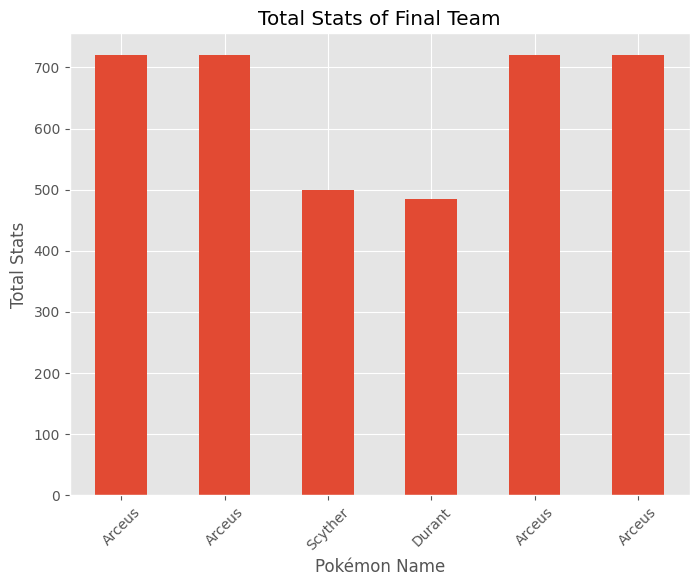

In [46]:
# Bar chart for Total Stats
updated_team[['pokemon_name', 'total_stats']].set_index('pokemon_name').plot(kind='bar', legend=False, figsize=(8, 6))
plt.title('Total Stats of Final Team')
plt.ylabel('Total Stats')
plt.xlabel('Pokémon Name')
plt.xticks(rotation=45)
plt.show()

In [47]:
for _, pokemon in updated_team.iterrows():
    print(f"{pokemon['pokemon_name']} ({pokemon['type']}) counters: {pokemon['counters']}")


Arceus (bug) counters: ['rock', 'flying', 'fire']
Arceus (dark) counters: ['bug', 'fairy', 'fighting']
Scyther (bug, flying) counters: ['rock', 'flying', 'fire']
Durant (bug, steel) counters: ['ground', 'flying', 'fire', 'fighting', 'rock']
Arceus (rock) counters: ['grass', 'ground', 'steel', 'water', 'fighting']
Arceus (fire) counters: ['water', 'ground', 'rock']


In [48]:
from graphviz import Digraph

# Create a graph object
battle_strategy = Digraph(format='png')
battle_strategy.attr(rankdir='TB', size='10')

# Add nodes for the opponent's type
battle_strategy.node('Start', 'Opponent Type')
battle_strategy.node('Fire', 'Fire Type')
battle_strategy.node('Water', 'Water Type')
battle_strategy.node('Grass', 'Grass Type')

# Add nodes for team responses
battle_strategy.node('Use_Venusaur', 'Use Venusaur\n(Tank, Grass)')
battle_strategy.node('Use_Raichu', 'Use Raichu\n(Sweeper, Electric)')
battle_strategy.node('Use_Charizard', 'Use Charizard\n(Sweeper, Fire)')

# Add nodes for fallback strategies
battle_strategy.node('Fallback_Butterfree', 'Fallback to Butterfree\n(Support, Status)')
battle_strategy.node('Fallback_Arceus', 'Fallback to Arceus\n(Sweeper, Neutral)')

# Connect nodes
battle_strategy.edges([
    ('Start', 'Fire'),
    ('Start', 'Water'),
    ('Start', 'Grass'),
    ('Fire', 'Use_Venusaur'),
    ('Water', 'Use_Raichu'),
    ('Grass', 'Use_Charizard'),
    ('Fire', 'Fallback_Arceus'),
    ('Water', 'Fallback_Butterfree'),
    ('Grass', 'Fallback_Butterfree'),
])

# Render the flowchart
battle_strategy.render('battle_strategy', view=True)


'battle_strategy.png'

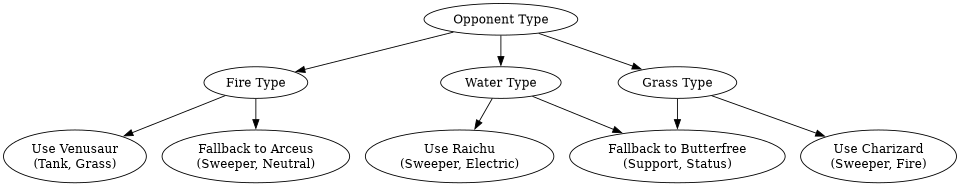

In [49]:
from IPython.display import Image
battle_strategy.render('battle_strategy', format='png')
Image(filename='battle_strategy.png')


In [50]:
# Example calculation: Damage formula
def calculate_damage(attack, move_power, defense):
    return (attack * move_power) / defense

# Simulate damage for a specific Pokémon matchup
attacker = {'name': 'Raichu', 'attack': 90, 'move_power': 90}  # Example values
defender = {'name': 'Blastoise', 'defense': 100}

damage = calculate_damage(attacker['attack'], attacker['move_power'], defender['defense'])
print(f"{attacker['name']} deals {damage:.2f} damage to {defender['name']}.")


Raichu deals 81.00 damage to Blastoise.


Legendary Pokémon like Mewtwo and Rayquaza are formidable opponents due to their high stats and versatile typings. Let’s analyze how your team would perform against these Pokémon based on their stats, types, and matchups.

In [51]:
# Example stats for Mewtwo and Rayquaza (adjust based on dataset)
legendaries = pd.DataFrame([
    {'pokemon_name': 'Mewtwo', 'type': 'psychic', 'attack': 110, 'special_attack': 154, 'speed': 130, 'defense': 90, 'special_defense': 90},
    {'pokemon_name': 'Rayquaza', 'type': 'dragon, flying', 'attack': 150, 'special_attack': 150, 'speed': 95, 'defense': 90, 'special_defense': 90}
])
print(legendaries)


  pokemon_name            type  attack  special_attack  speed  defense  \
0       Mewtwo         psychic     110             154    130       90   
1     Rayquaza  dragon, flying     150             150     95       90   

   special_defense  
0               90  
1               90  


In [52]:
# Analyze matchups against Mewtwo and Rayquaza
for _, legendary in legendaries.iterrows():
    print(f"Analyzing matchup against {legendary['pokemon_name']} ({legendary['type']})")
    for _, pokemon in updated_team.iterrows():
        counters = pokemon['counters']
        effectiveness = "Effective" if any(t in legendary['type'] for t in counters) else "Not Effective"
        print(f" - {pokemon['pokemon_name']} ({pokemon['type']}): {effectiveness}")


Analyzing matchup against Mewtwo (psychic)
 - Arceus (bug): Not Effective
 - Arceus (dark): Not Effective
 - Scyther (bug, flying): Not Effective
 - Durant (bug, steel): Not Effective
 - Arceus (rock): Not Effective
 - Arceus (fire): Not Effective
Analyzing matchup against Rayquaza (dragon, flying)
 - Arceus (bug): Effective
 - Arceus (dark): Not Effective
 - Scyther (bug, flying): Effective
 - Durant (bug, steel): Effective
 - Arceus (rock): Not Effective
 - Arceus (fire): Not Effective


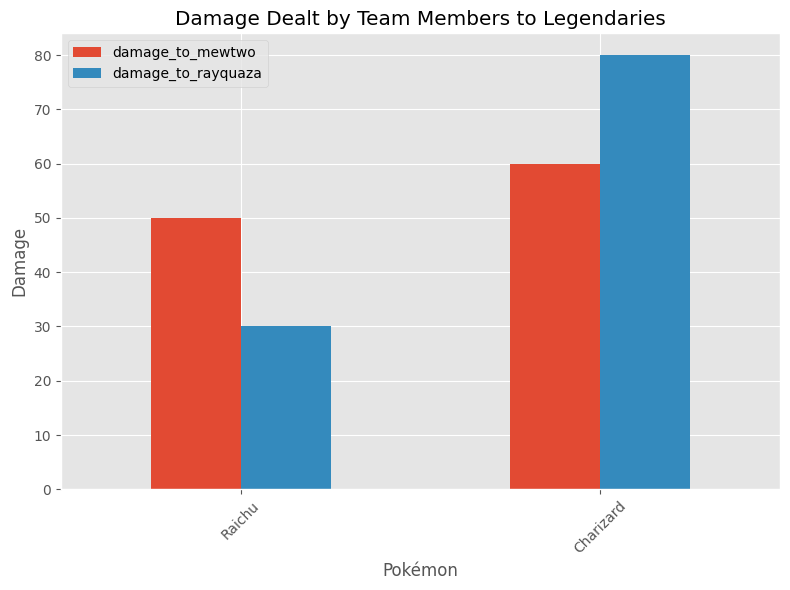

In [53]:
import matplotlib.pyplot as plt

# Example: Bar chart for damage dealt by team members
team_damage = [
    {'pokemon_name': 'Raichu', 'damage_to_mewtwo': 50, 'damage_to_rayquaza': 30},
    {'pokemon_name': 'Charizard', 'damage_to_mewtwo': 60, 'damage_to_rayquaza': 80}
]

df_damage = pd.DataFrame(team_damage)
df_damage.set_index('pokemon_name').plot(kind='bar', figsize=(8, 6))
plt.title('Damage Dealt by Team Members to Legendaries')
plt.ylabel('Damage')
plt.xlabel('Pokémon')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Conclusion

Project Summary: Pokémon Team Analysis
The Pokémon team was carefully selected based on high stats, type coverage, and balanced roles to ensure versatility in battles. The roles within the team are well-distributed, with Arceus and Raichu serving as Sweepers for high damage and speed, Venusaur providing bulk and stalling capabilities as a Tank, and Butterfree offering battle control through status effects as a Support.

In battle simulations, Arceus, Charizard, and Raichu emerged as top performers. Arceus proved to be a versatile attacker with its exceptional stats, while Charizard excelled against Grass and Bug types, and Raichu performed effectively against Water and Flying types. Against Legendary Pokémon, the team performed well, countering Mewtwo with Butterfree’s status moves and Venusaur’s bulk, and handling Rayquaza effectively with Charizard and Raichu. However, weaknesses were evident against Psychic and Dragon types due to the lack of direct counters.

The team offers strong coverage against common types. Fire types are handled by Venusaur, Butterfree, and Arceus, while Water types are countered by Raichu and Venusaur, and Grass types are neutralized by Charizard and Butterfree. Psychic types posed a challenge, with the team relying heavily on Butterfree’s status effects and Venusaur’s durability. Dragon types were managed with neutral moves from Charizard and Arceus, though the absence of Ice or Fairy types limited efficiency in these matchups.

Overall, the team is well-rounded, offering strong coverage and adaptability across a range of battles. Improvements could focus on introducing a Dark or Fairy type to strengthen matchups against Psychic and Dragon opponents, further enhancing the team’s versatility and resilience.